In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

In [5]:
#Import the original dataset
df1=pd.read_csv("fifa21_male2.csv", low_memory=False)

In [6]:
df1.shape

(17125, 107)

In [7]:
df1.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [73]:
df1.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [8]:
#as i have already defined my analysis i create a subset only with the columns that i will use
fifa=df1[['Age', 'OVA', 'Wage', 'Value']].copy()

In [9]:
fifa.head()

,Age,OVA,Wage,Value
0,33,69,€7K,€625K
1,37,71,€7K,€600K
2,33,71,€15K,€1.1M
3,36,68,€0,€0
4,36,81,€12K,€5.5M


In [10]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     17125 non-null  int64 
 1   OVA     17125 non-null  int64 
 2   Wage    17125 non-null  object
 3   Value   17125 non-null  object
dtypes: int64(2), object(2)
memory usage: 535.3+ KB


In [11]:
#for clarity here i change the name of the column Wage to Salary, Value to Market_Value and ova to Overall_Rating
fifa=fifa.rename(columns={'OVA':'Overall_Rating', 'Wage':'Salary', 'Value':'Market_Value'})

In [12]:
fifa.head()

,Age,Overall_Rating,Salary,Market_Value
0,33,69,€7K,€625K
1,37,71,€7K,€600K
2,33,71,€15K,€1.1M
3,36,68,€0,€0
4,36,81,€12K,€5.5M


In [13]:
#Here i will change the type of Salary and Market_Value to numeric
fifa ['Salary'] = fifa ['Salary'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
fifa ['Market_Value'] = fifa ['Market_Value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
fifa.head()

/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_19675/1548790898.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fifa ['Salary'] = fifa ['Salary'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')
/var/folders/6t/sjljqxpn7650823v529jrghc0000gn/T/ipykernel_19675/1548790898.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fifa ['Market_Value'] = fifa ['Market_Value'].str.replace('€', '').str.replace('K', '000').str.replace('M', '000000').str.replace('.', '')


,Age,Overall_Rating,Salary,Market_Value
0,33,69,7000,625000
1,37,71,7000,600000
2,33,71,15000,11000000
3,36,68,0,0
4,36,81,12000,55000000


In [14]:
fifa.dtypes

Age                int64
Overall_Rating     int64
Salary            object
Market_Value      object
dtype: object

In [15]:
#convert object to numerical
fifa[['Salary', 'Market_Value']] = fifa[['Salary', 'Market_Value']].astype(int)

In [16]:
fifa.dtypes

Age               int64
Overall_Rating    int64
Salary            int64
Market_Value      int64
dtype: object

In [17]:
fifa.isnull().sum()

Age               0
Overall_Rating    0
Salary            0
Market_Value      0
dtype: int64

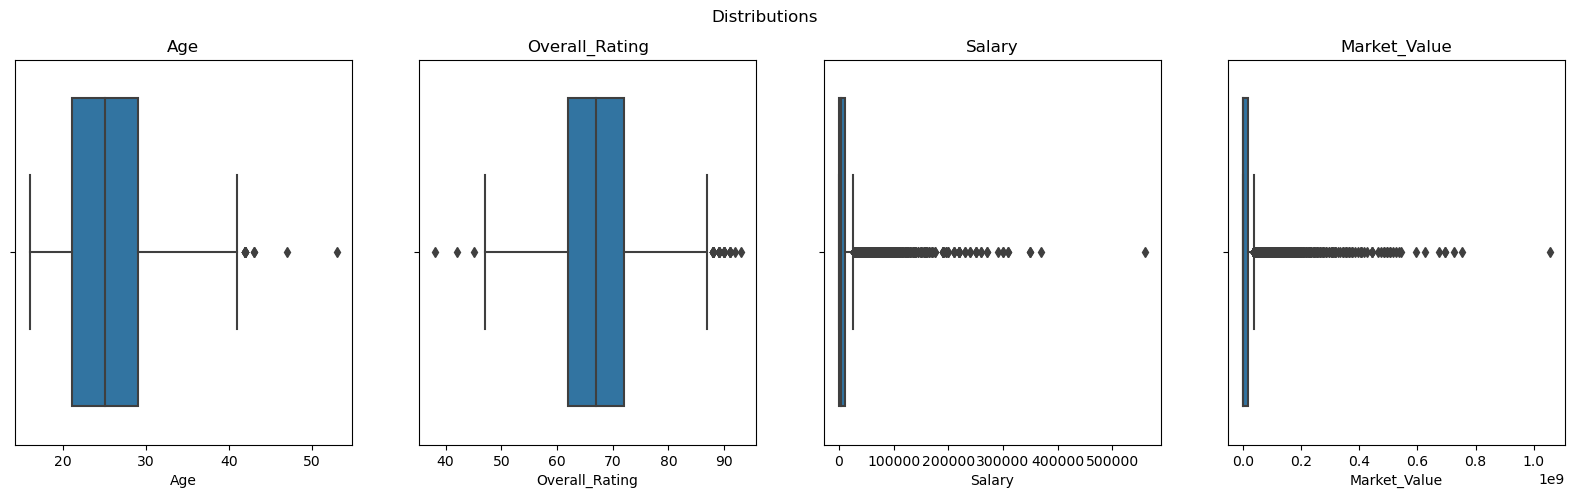

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))
  
fig.suptitle('Distributions')
                        
sns.boxplot(ax=axes[0],data=fifa, x='Age')
axes[0].set_title('Age')
sns.boxplot(ax=axes[1],data=fifa, x='Overall_Rating')
axes[1].set_title('Overall_Rating')
sns.boxplot(ax=axes[2],data=fifa, x='Salary')
axes[2].set_title('Salary')
sns.boxplot(ax=axes[3],data=fifa, x='Market_Value')
axes[3].set_title('Market_Value')
plt.show()

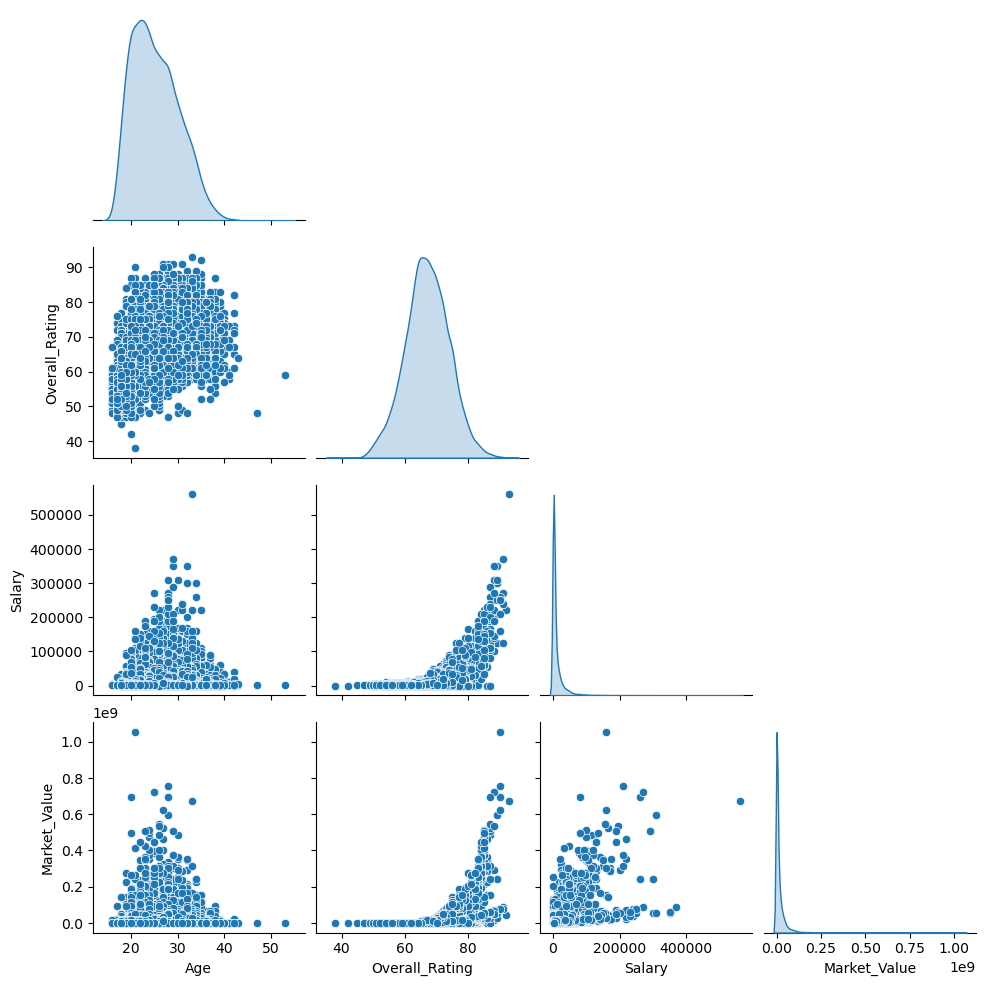

In [19]:
sns.pairplot(fifa, diag_kind = 'kde', corner= True);

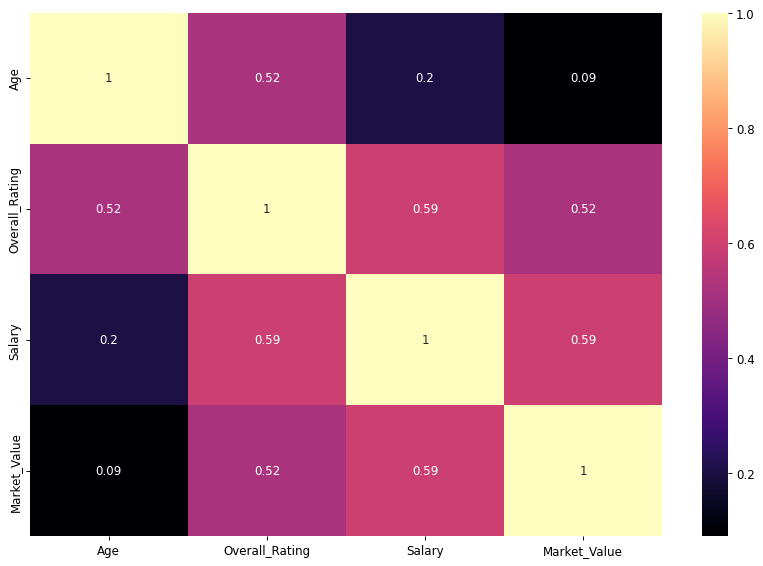

In [20]:
plt.figure(figsize= (12,8), dpi= 85)

corr_matrix = fifa.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');


In [21]:
Y=fifa['Market_Value']
X=fifa.drop(['Market_Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4129.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:36:20   Log-Likelihood:            -3.1885e+05
No. Observations:               17125   AIC:                         6.377e+05
Df Residuals:                   17121   BIC:                         6.377e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.679e+07   2.67e+06    -36.

In [22]:
catfifa=df1[['Nationality', 'Club']].copy()

In [23]:
catfifa

,Nationality,Club
0,Italy,Udinese
1,Spain,KAS Eupen
2,England,Coventry City
3,Trinidad &amp; Tobago,Sunderland
4,Spain,Vissel Kobe
...,...,...
17120,France,CD Tondela
17121,Wales,Burnley
17122,England,Burnley
17123,Bosnia Herzegovina,SK Sturm Graz


In [24]:
catfifa.isnull().sum()

Nationality     0
Club           23
dtype: int64

In [25]:
catfifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Nationality  17125 non-null  object
 1   Club         17102 non-null  object
dtypes: object(2)
memory usage: 267.7+ KB


In [26]:
catfifa.dropna(inplace=True)

In [27]:
#aca convierto catfifa en numerical
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(catfifa)
encoded = encoder.transform(catfifa).toarray()
feature_names = encoder.get_feature_names_out(catfifa.columns)
cat_encoded = pd.DataFrame(encoded, columns=feature_names)

In [28]:
cat_encoded

,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,Nationality_Armenia,Nationality_Aruba,Nationality_Australia,Nationality_Austria,...,Club_Yokohama FC,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Zamora FC,Club_Zenit St. Petersburg,Club_Çaykur Rizespor,Club_Évian Thonon Gaillard FC,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
MinMaxtransformer = MinMaxScaler().fit(fifa)
x_norm = MinMaxtransformer.transform(fifa)
x_norm.shape
x_norm = pd.DataFrame(x_norm,columns=fifa.columns)
x_norm.head()

,Age,Overall_Rating,Salary,Market_Value
0,0.459459,0.563636,0.012500,0.000592
1,0.567568,0.600000,0.012500,0.000569
2,0.459459,0.600000,0.026786,0.010427
3,0.540541,0.545455,0.000000,0.000000
4,0.540541,0.781818,0.021429,0.052133


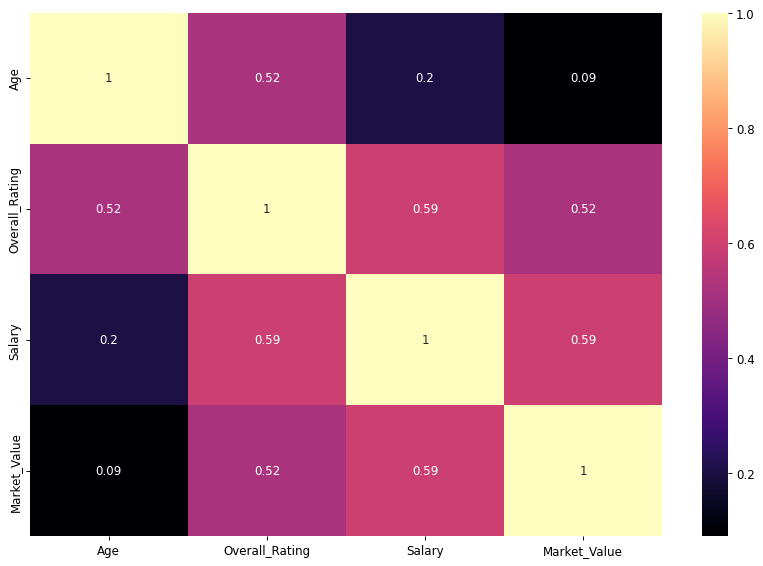

In [30]:
plt.figure(figsize= (12,8), dpi= 85)

corr_matrix = x_norm.corr()
sns.heatmap(corr_matrix, annot=True, cmap= 'magma');

In [31]:
Y=x_norm['Market_Value']
X=x_norm.drop(['Market_Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_Value   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     4129.
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        23:36:28   Log-Likelihood:                 36955.
No. Observations:               17125   AIC:                        -7.390e+04
Df Residuals:                   17121   BIC:                        -7.387e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0381      0.001    -35.

In [32]:
fifa_concat = pd.concat([x_norm, cat_encoded], axis=1)

In [33]:
fifa_concat

,Age,Overall_Rating,Salary,Market_Value,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,...,Club_Yokohama FC,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Zamora FC,Club_Zenit St. Petersburg,Club_Çaykur Rizespor,Club_Évian Thonon Gaillard FC,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,0.459459,0.563636,0.012500,0.000592,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.567568,0.600000,0.012500,0.000569,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.459459,0.600000,0.026786,0.010427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.540541,0.545455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.540541,0.781818,0.021429,0.052133,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,0.162162,0.472727,0.003571,0.000521,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17121,0.054054,0.327273,0.005357,0.000123,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17122,0.054054,0.327273,0.003571,0.000123,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17123,0.108108,0.436364,0.005357,0.000450,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
fifa_concat.isnull().sum()

Age                               0
Overall_Rating                    0
Salary                            0
Market_Value                      0
Nationality_Albania              23
                                 ..
Club_Çaykur Rizespor             23
Club_Évian Thonon Gaillard FC    23
Club_Örebro SK                   23
Club_Östersunds FK               23
Club_Śląsk Wrocław               23
Length: 1086, dtype: int64

In [35]:
fifa_concat.dropna(inplace=True)

In [36]:
fifa_concat

,Age,Overall_Rating,Salary,Market_Value,Nationality_Albania,Nationality_Algeria,Nationality_Andorra,Nationality_Angola,Nationality_Antigua &amp; Barbuda,Nationality_Argentina,...,Club_Yokohama FC,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Zamora FC,Club_Zenit St. Petersburg,Club_Çaykur Rizespor,Club_Évian Thonon Gaillard FC,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,0.459459,0.563636,0.012500,0.000592,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.567568,0.600000,0.012500,0.000569,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.459459,0.600000,0.026786,0.010427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.540541,0.545455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.540541,0.781818,0.021429,0.052133,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,0.054054,0.345455,0.001786,0.000199,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17098,0.108108,0.490909,0.000893,0.000948,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17099,0.135135,0.490909,0.000893,0.000782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17100,0.189189,0.581818,0.000893,0.001896,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
columns_to_drop = [col for col in fifa_concat.columns if col.startswith('Nationality')]
fifa_concat = fifa_concat.drop(columns=columns_to_drop)

In [38]:
fifa_concat

,Age,Overall_Rating,Salary,Market_Value,Club_1. FC Kaiserslautern,Club_1. FC Köln,Club_1. FC Magdeburg,Club_1. FC Nürnberg,Club_1. FC Saarbrücken,Club_1. FC Union Berlin,...,Club_Yokohama FC,Club_Zagłębie Lubin,Club_Zagłębie Sosnowiec,Club_Zamora FC,Club_Zenit St. Petersburg,Club_Çaykur Rizespor,Club_Évian Thonon Gaillard FC,Club_Örebro SK,Club_Östersunds FK,Club_Śląsk Wrocław
0,0.459459,0.563636,0.012500,0.000592,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.567568,0.600000,0.012500,0.000569,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.459459,0.600000,0.026786,0.010427,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.540541,0.545455,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.540541,0.781818,0.021429,0.052133,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,0.054054,0.345455,0.001786,0.000199,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17098,0.108108,0.490909,0.000893,0.000948,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17099,0.135135,0.490909,0.000893,0.000782,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17100,0.189189,0.581818,0.000893,0.001896,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
Y=fifa_concat['Market_Value']
X=fifa_concat.drop(['Market_Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
p_values = model.pvalues
significance_level = 0.05
high_p_variables = p_values[p_values > significance_level].index
X_dropped = X.drop(columns=high_p_variables)


In [44]:
X_dropped

,const,Age,Overall_Rating,Salary,Club_ADO Den Haag,Club_AEK Athens,Club_AS Monaco,Club_Al Faisaly,Club_Al Ittihad,Club_Al Nassr,...,Club_VfL Bochum 1848,Club_VfR Aalen,Club_Viktoria Köln,Club_Villarreal CF,Club_Walsall,Club_West Bromwich Albion,Club_West Ham United,Club_Wisła Kraków,Club_Wycombe Wanderers,Club_Östersunds FK
0,1.0,0.459459,0.563636,0.012500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.567568,0.600000,0.012500,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.459459,0.600000,0.026786,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.540541,0.545455,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.540541,0.781818,0.021429,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,1.0,0.054054,0.345455,0.001786,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17098,1.0,0.108108,0.490909,0.000893,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17099,1.0,0.135135,0.490909,0.000893,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17100,1.0,0.189189,0.581818,0.000893,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
club_drop = X_dropped.filter(regex=r'^Club').columns.tolist()

In [46]:
club_drop

['Club_ADO Den Haag',
 'Club_AEK Athens',
 'Club_AS Monaco',
 'Club_Al Faisaly',
 'Club_Al Ittihad',
 'Club_Al Nassr',
 'Club_América de Cali',
 'Club_Angers SCO',
 'Club_Antalyaspor',
 'Club_Atalanta',
 'Club_Atiker Konyaspor',
 'Club_Atlético Nacional',
 'Club_Atlético de San Luis',
 'Club_Beijing Sinobo Guoan FC',
 'Club_Blackburn Rovers',
 'Club_Blackpool',
 'Club_Borussia Dortmund',
 'Club_Brazil',
 'Club_Brescia',
 'Club_Brighton & Hove Albion',
 'Club_Bulgaria',
 'Club_Burnley',
 'Club_CD Leganés',
 'Club_CD Tenerife',
 'Club_CF Fuenlabrada',
 'Club_Cambridge United',
 'Club_Chamois Niortais Football Club',
 'Club_Clermont Foot 63',
 'Club_Club Brugge KV',
 'Club_Colo-Colo',
 'Club_Columbus Crew SC',
 'Club_Coventry City',
 'Club_Crawley Town',
 'Club_Cruz Azul',
 'Club_Cúcuta Deportivo',
 'Club_DSC Arminia Bielefeld',
 'Club_Dalian YiFang FC',
 'Club_Deportivo Toluca',
 'Club_Dundalk',
 'Club_Eintracht Braunschweig',
 'Club_Empoli',
 'Club_En Avant de Guingamp',
 'Club_FC Barce

In [47]:
club_drop.append('Age')

In [48]:
club_drop

['Club_ADO Den Haag',
 'Club_AEK Athens',
 'Club_AS Monaco',
 'Club_Al Faisaly',
 'Club_Al Ittihad',
 'Club_Al Nassr',
 'Club_América de Cali',
 'Club_Angers SCO',
 'Club_Antalyaspor',
 'Club_Atalanta',
 'Club_Atiker Konyaspor',
 'Club_Atlético Nacional',
 'Club_Atlético de San Luis',
 'Club_Beijing Sinobo Guoan FC',
 'Club_Blackburn Rovers',
 'Club_Blackpool',
 'Club_Borussia Dortmund',
 'Club_Brazil',
 'Club_Brescia',
 'Club_Brighton & Hove Albion',
 'Club_Bulgaria',
 'Club_Burnley',
 'Club_CD Leganés',
 'Club_CD Tenerife',
 'Club_CF Fuenlabrada',
 'Club_Cambridge United',
 'Club_Chamois Niortais Football Club',
 'Club_Clermont Foot 63',
 'Club_Club Brugge KV',
 'Club_Colo-Colo',
 'Club_Columbus Crew SC',
 'Club_Coventry City',
 'Club_Crawley Town',
 'Club_Cruz Azul',
 'Club_Cúcuta Deportivo',
 'Club_DSC Arminia Bielefeld',
 'Club_Dalian YiFang FC',
 'Club_Deportivo Toluca',
 'Club_Dundalk',
 'Club_Eintracht Braunschweig',
 'Club_Empoli',
 'Club_En Avant de Guingamp',
 'Club_FC Barce

In [51]:
club_drop.append('Salary')

In [52]:
club_drop.append('Market_Value')

In [53]:
club_drop.append('Overall_Rating')

In [54]:
club_drop

['Club_ADO Den Haag',
 'Club_AEK Athens',
 'Club_AS Monaco',
 'Club_Al Faisaly',
 'Club_Al Ittihad',
 'Club_Al Nassr',
 'Club_América de Cali',
 'Club_Angers SCO',
 'Club_Antalyaspor',
 'Club_Atalanta',
 'Club_Atiker Konyaspor',
 'Club_Atlético Nacional',
 'Club_Atlético de San Luis',
 'Club_Beijing Sinobo Guoan FC',
 'Club_Blackburn Rovers',
 'Club_Blackpool',
 'Club_Borussia Dortmund',
 'Club_Brazil',
 'Club_Brescia',
 'Club_Brighton & Hove Albion',
 'Club_Bulgaria',
 'Club_Burnley',
 'Club_CD Leganés',
 'Club_CD Tenerife',
 'Club_CF Fuenlabrada',
 'Club_Cambridge United',
 'Club_Chamois Niortais Football Club',
 'Club_Clermont Foot 63',
 'Club_Club Brugge KV',
 'Club_Colo-Colo',
 'Club_Columbus Crew SC',
 'Club_Coventry City',
 'Club_Crawley Town',
 'Club_Cruz Azul',
 'Club_Cúcuta Deportivo',
 'Club_DSC Arminia Bielefeld',
 'Club_Dalian YiFang FC',
 'Club_Deportivo Toluca',
 'Club_Dundalk',
 'Club_Eintracht Braunschweig',
 'Club_Empoli',
 'Club_En Avant de Guingamp',
 'Club_FC Barce

In [60]:
club_drop.remove('Salary')

In [61]:
club_drop

['Club_ADO Den Haag',
 'Club_AEK Athens',
 'Club_AS Monaco',
 'Club_Al Faisaly',
 'Club_Al Ittihad',
 'Club_Al Nassr',
 'Club_América de Cali',
 'Club_Angers SCO',
 'Club_Antalyaspor',
 'Club_Atalanta',
 'Club_Atiker Konyaspor',
 'Club_Atlético Nacional',
 'Club_Atlético de San Luis',
 'Club_Beijing Sinobo Guoan FC',
 'Club_Blackburn Rovers',
 'Club_Blackpool',
 'Club_Borussia Dortmund',
 'Club_Brazil',
 'Club_Brescia',
 'Club_Brighton & Hove Albion',
 'Club_Bulgaria',
 'Club_Burnley',
 'Club_CD Leganés',
 'Club_CD Tenerife',
 'Club_CF Fuenlabrada',
 'Club_Cambridge United',
 'Club_Chamois Niortais Football Club',
 'Club_Clermont Foot 63',
 'Club_Club Brugge KV',
 'Club_Colo-Colo',
 'Club_Columbus Crew SC',
 'Club_Coventry City',
 'Club_Crawley Town',
 'Club_Cruz Azul',
 'Club_Cúcuta Deportivo',
 'Club_DSC Arminia Bielefeld',
 'Club_Dalian YiFang FC',
 'Club_Deportivo Toluca',
 'Club_Dundalk',
 'Club_Eintracht Braunschweig',
 'Club_Empoli',
 'Club_En Avant de Guingamp',
 'Club_FC Barce

In [62]:
fifa_concat = fifa_concat[club_drop]

In [63]:
fifa_concat

,Club_ADO Den Haag,Club_AEK Athens,Club_AS Monaco,Club_Al Faisaly,Club_Al Ittihad,Club_Al Nassr,Club_América de Cali,Club_Angers SCO,Club_Antalyaspor,Club_Atalanta,...,Club_Walsall,Club_West Bromwich Albion,Club_West Ham United,Club_Wisła Kraków,Club_Wycombe Wanderers,Club_Östersunds FK,Age,Market_Value,Overall_Rating,Salary
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.459459,0.000592,0.563636,0.012500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.567568,0.000569,0.600000,0.012500
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.459459,0.010427,0.600000,0.026786
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.540541,0.000000,0.545455,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.540541,0.052133,0.781818,0.021429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.054054,0.000199,0.345455,0.001786
17098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.108108,0.000948,0.490909,0.000893
17099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.135135,0.000782,0.490909,0.000893
17100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.189189,0.001896,0.581818,0.000893


In [65]:
Y=fifa_concat['Market_Value']
X=fifa_concat.drop(['Market_Value'], axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Market_Value   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     88.23
Date:                Sat, 10 Jun 2023   Prob (F-statistic):               0.00
Time:                        00:45:15   Log-Likelihood:                 37099.
No. Observations:               17102   AIC:                        -7.390e+04
Df Residuals:                   16954   BIC:                        -7.276e+04
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [66]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=42)
lm=linear_model.LinearRegression()
model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
r2_score(y_test, predictions)

0.39567876660703394

In [67]:
mse=mean_squared_error(y_test, predictions) 
print(mse)

0.0005987876316579523


In [68]:
rmse = math.sqrt(mse)
print(rmse)

0.02447013754881554


In [69]:
r2 = r2_score(y_test, predictions)
r2

0.39567876660703394